##  Enosh Nyarige 
### Data Mining Final Project
#### Credit Card Fraud Detection

##### Jan - April 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## 1. Methods applied to acquire data

- Loading the downloaded dataset

In [2]:
!ls

creditCard_fraudDetection.ipynb  dataset  README.md


In [3]:
data = pd.read_csv("dataset/creditcard.csv")
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- In this dataset, we can only use Time, Amount and Class columns. 

- The class feature is in the form of: 
    - 1: fraud
    - 0: not_fraud

- From the Class feature, the value counts for the two labels is 284315 and 492 for not_fraud and fraud respectively

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Create a distribution graph for both labels

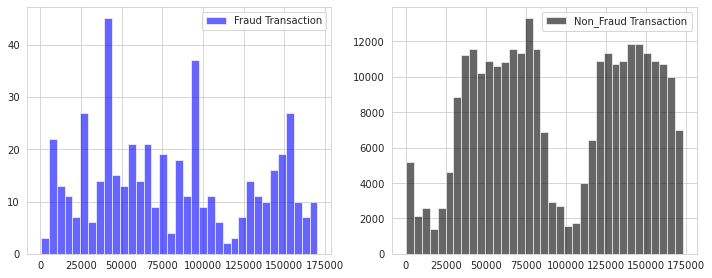

In [6]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraud Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='black', alpha=0.6, label="Non_Fraud Transaction")
plt.legend()

- Split the dataset for training and testing

   ## 4. Model building

In [35]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               7936      
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

## 5. Training of the model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

In [8]:
scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_validator, X_test, y_validator, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_validator, y_validator, test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

In [33]:
print("\n")
print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}\n\n{'*'*60}\n")
print(f"Validation Set: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n\n{'*'*60}\n")
print(f"Testing Set: X_test: {X_test.shape}, y_test: {y_test.shape}")
print("\n")



Training Set: X_train: (159491, 30), y_train: (159491,)

************************************************************

Validation Set: X_validate: (39873, 30), y_validate: (39873,)

************************************************************

Testing Set: X_test: (85443, 30), y_test: (85443,)




In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [52]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('mofraud_model.h5', save_best_only=True,monitor='val_loss', mode='min')]
# class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=3, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/3
78/78 [==============================] - 4s 31ms/step - loss: 1.8792e-04 - fn: 2.5443 - fp: 2.0506 - tn: 81744.4430 - tp: 138.6329 - precision: 0.9742 - recall: 0.9738 - val_loss: 0.0075 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 2/3
78/78 [==============================] - 2s 26ms/step - loss: 2.3058e-04 - fn: 2.9367 - fp: 1.8481 - tn: 81740.2152 - tp: 142.6709 - precision: 0.9879 - recall: 0.9729 - val_loss: 0.0074 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 3/3
78/78 [==============================] - 2s 26ms/step - loss: 4.6673e-04 - fn: 7.6076 - fp: 2.9367 - tn: 81737.6962 - tp: 139.4304 - precision: 0.9803 - recall: 0.9412 - val_loss: 0.0073 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Fitting! Hit CTRL-C to stop early...


In [39]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0046 - fn: 26.0000 - fp: 13.0000 - tn: 85294.0000 - tp: 110.0000 - precision: 0.8943 - recall: 0.8088
[0.004586257506161928, 26.0, 13.0, 85294.0, 110.0, 0.8943089246749878, 0.8088235259056091]


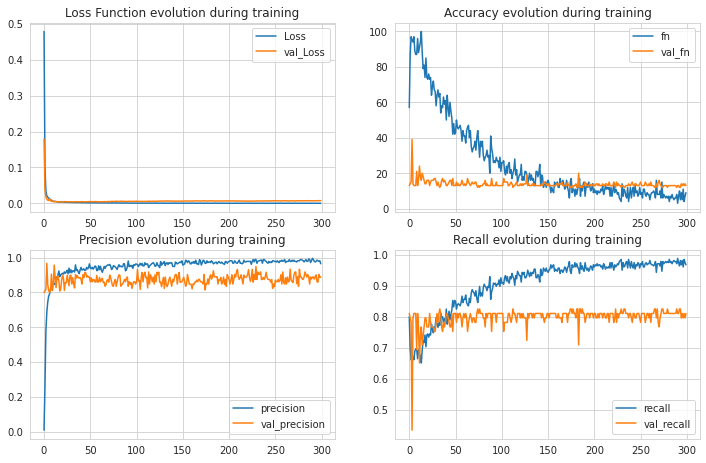

In [40]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [41]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999981    1.000000  0.999981       0.999991       0.999981
recall          1.000000    0.989547  0.999981       0.994774       0.999981
f1-score        0.999991    0.994746  0.999981       0.997368       0.999981
support    159204.000000  287.000000  0.999981  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     3    284]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999695    0.894309  0.999544      0.947002      0.999528
recall         0.999848    0.808824  0.999544      0.904336      0.999544
f1-score       0.999771    0.849421  0.999544      0.924596      0.999532

## 6. Extraction of rules, trends or patterns

## 7. Visualization of  rules, trends or patterns

## 8. Model evaluation techniques

## 9. Optimizing the evaluated model